# Universal Bank Case Study


#### Universal Bank is a relatively young bank growing rapidly in terms of overall customer acquisition. The majority of these customers are liability customers (depositors) with varying sizes of relationship with the bank. The customer base of asset customers (borrowers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business. In particular, it wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).
#### A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise smarter campaigns with better target marketing. The goal is to predict whether a new customer will accept a loan offer. This will serve as the basis for the design of a new campaign.

## Universal Bank Dataset – Feature Descriptions

The dataset contains customer-level attributes used for predicting **personal loan acceptance**. Below is a description of each feature:

- **Age**: Customer’s age in completed years  
- **Experience**: Number of years of professional experience  
- **Income**: Annual income of the customer
- **Family**: Family size of the customer  
- **CCAvg**: Average monthly spending on credit cards 
- **Education**: Education level of the customer  
  - 1 = Undergraduate  
  - 2 = Graduate  
  - 3 = Advanced/Professional  
- **Mortgage**: Value of house mortgage if any 
- **Securities Account**: Coded as 1 if the customer has a securities account with the bank, else 0  
- **CD Account**: Coded as 1 if the customer has a certificate of deposit (CD) account, else 0  
- **Online Banking**: Coded as 1 if the customer uses internet banking facilities, else 0  
- **Credit Card**: Coded as 1 if the customer uses a credit card issued by Universal Bank, else 0  


In [11]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

In [13]:
df = pd.read_csv("UniversalBank.csv")

In [15]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [17]:
df.shape

(5000, 14)

- There are 5000 rows and 14 columns

In [20]:
#Null values check
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

- There are no null values

In [23]:
#No duplicates
df.duplicated().sum()

0

- There are no duplicates

In [26]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [28]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


- **`ID`**: This is just a unique identifier for each customer. It doesn’t contain any useful information for predicting loan acceptance and can introduce noise if included.

- **`ZIP Code`**: While it represents a customer’s location, it behaves more like a categorical label with too many unique values. It doesn’t provide meaningful predictive power in this context and can make the model unnecessarily complex.

Therefore, both `ID` and `ZIP Code` are dropped to keep the dataset clean and focused on relevant features for prediction.

In [43]:
df_new = df.drop(['ID', 'ZIP Code'], axis = 1)
df_new.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


# EDA

# Univariant Analysis

In [47]:
# GPT reference
import matplotlib.pyplot as plt
import seaborn as sns

def labeled_barplot_grid(data, features, rows=3, cols=4, perc=False, n=None):
    """
    Display multiple labeled barplots in a grid layout.

    data: dataframe
    features: list of columns to plot
    rows: number of subplot rows
    cols: number of subplot columns
    perc: whether to display percentages instead of counts
    n: top N categories to display
    """
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        total = len(data[feature])
        count = data[feature].nunique()

        sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            ax=axes[i],
            order=data[feature].value_counts().index[:n].sort_values(),
        )
        axes[i].tick_params(axis='x', rotation=90)

        for p in axes[i].patches:
            if perc:
                label = "{:.1f}%".format(100 * p.get_height() / total)
            else:
                label = p.get_height()

            x = p.get_x() + p.get_width() / 2
            y = p.get_height()

            axes[i].annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=10,
                xytext=(0, 5),
                textcoords="offset points",
            )

        axes[i].set_title(f"{feature}", fontsize=14)

    # Remove extra subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [49]:
df_new.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

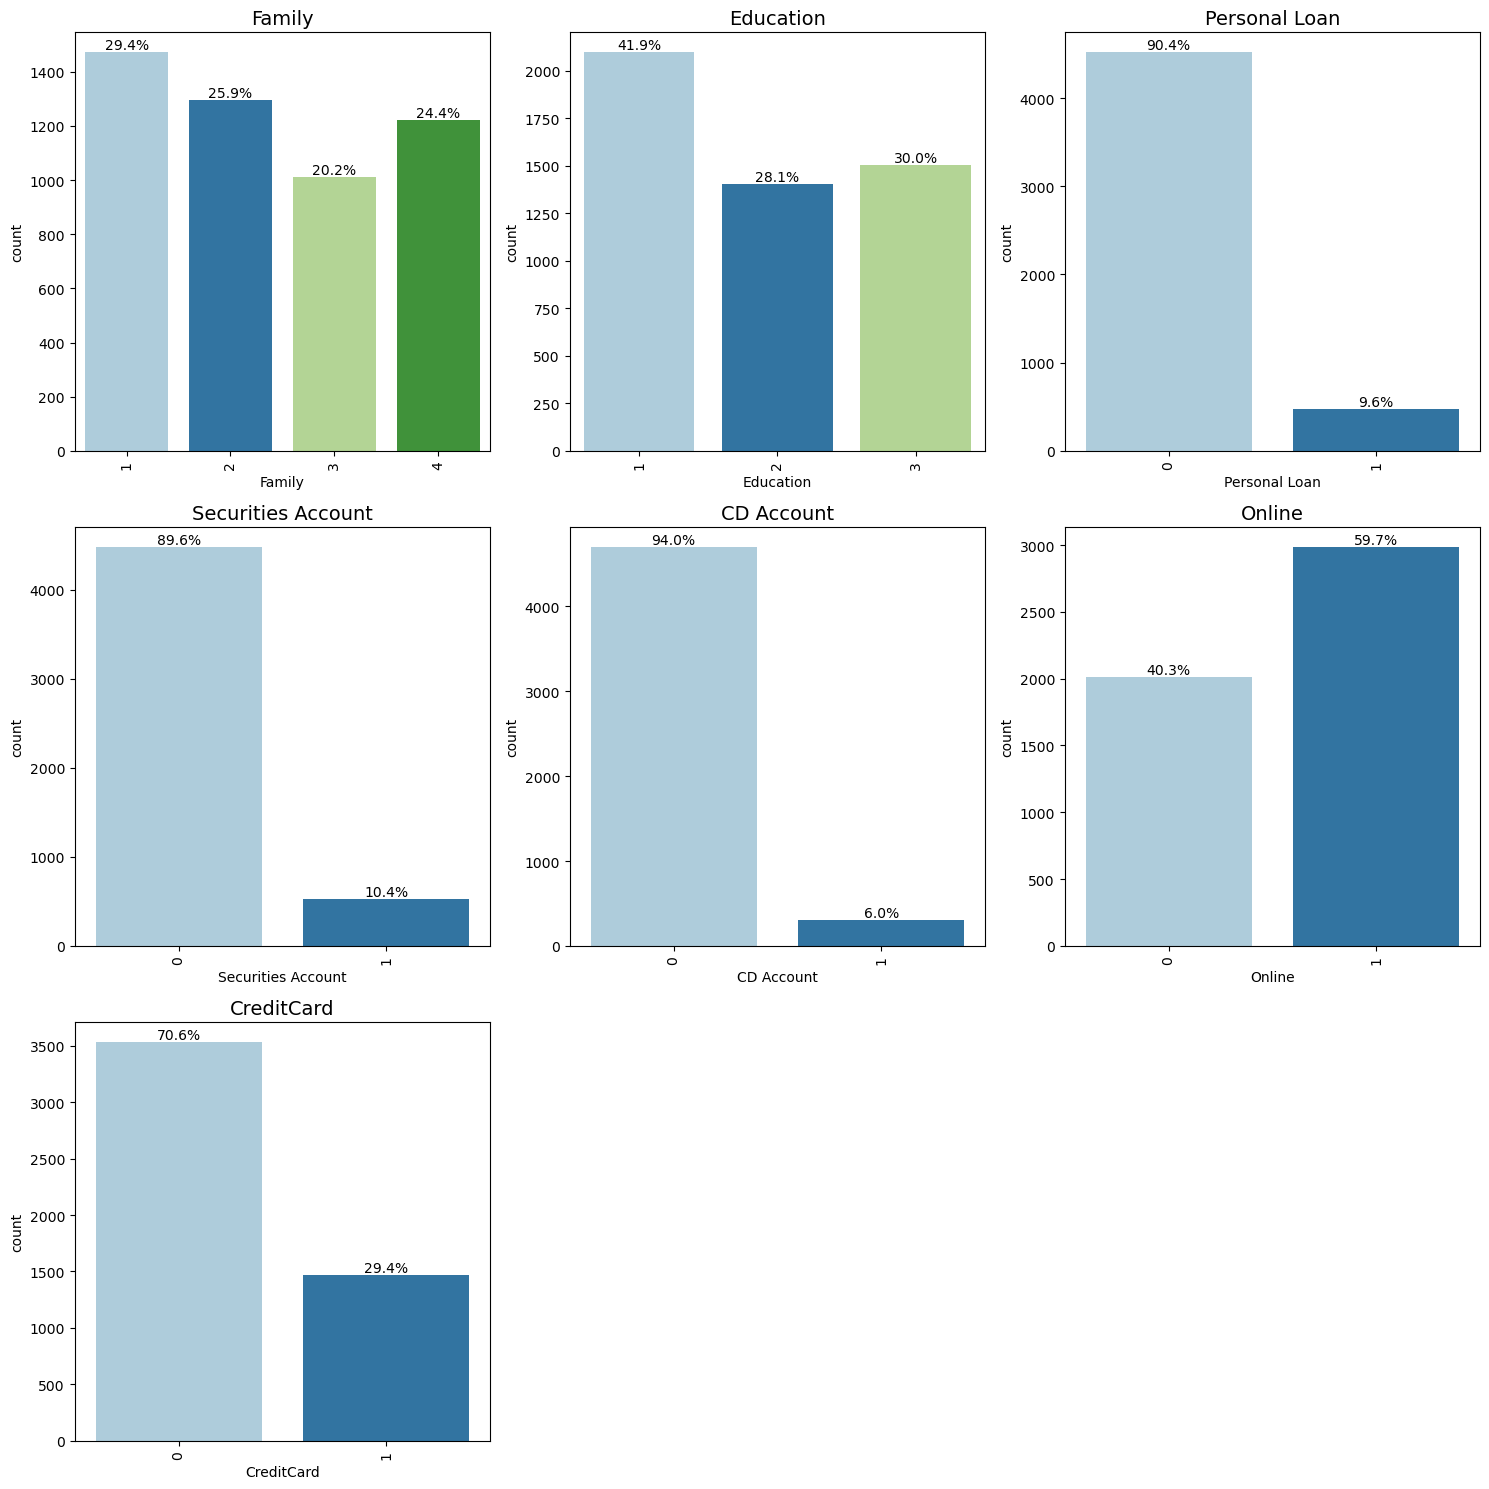

In [51]:
columns_to_plot = [
    'Family', 'Education', 'Personal Loan',
    'Securities Account', 'CD Account', 'Online', 'CreditCard'
]

# 2 rows × 4 columns grid (adjust as needed)
labeled_barplot_grid(data=df_new, features=columns_to_plot, rows=3, cols=3, perc=True)


### Univariate Analysis of Categorical Features

- **Family**: Most customers belong to smaller families (1–3 members), with family size 1 being the most frequent.
- **Education**: Education level 1 (Undergraduate) is the most common, followed by level 2 (Graduate).
- **Personal Loan**: The dataset is imbalanced — a large majority of customers did not accept the loan offer.
- **Securities Account** and **CD Account**: Most customers do not have these accounts. These are rare features.
- **Online**: Slightly more customers do not use online banking than those who do.
- **CreditCard**: A majority of customers (**70.6%**) do not use a credit card issued by the bank. Only 29.4% of customers own one.


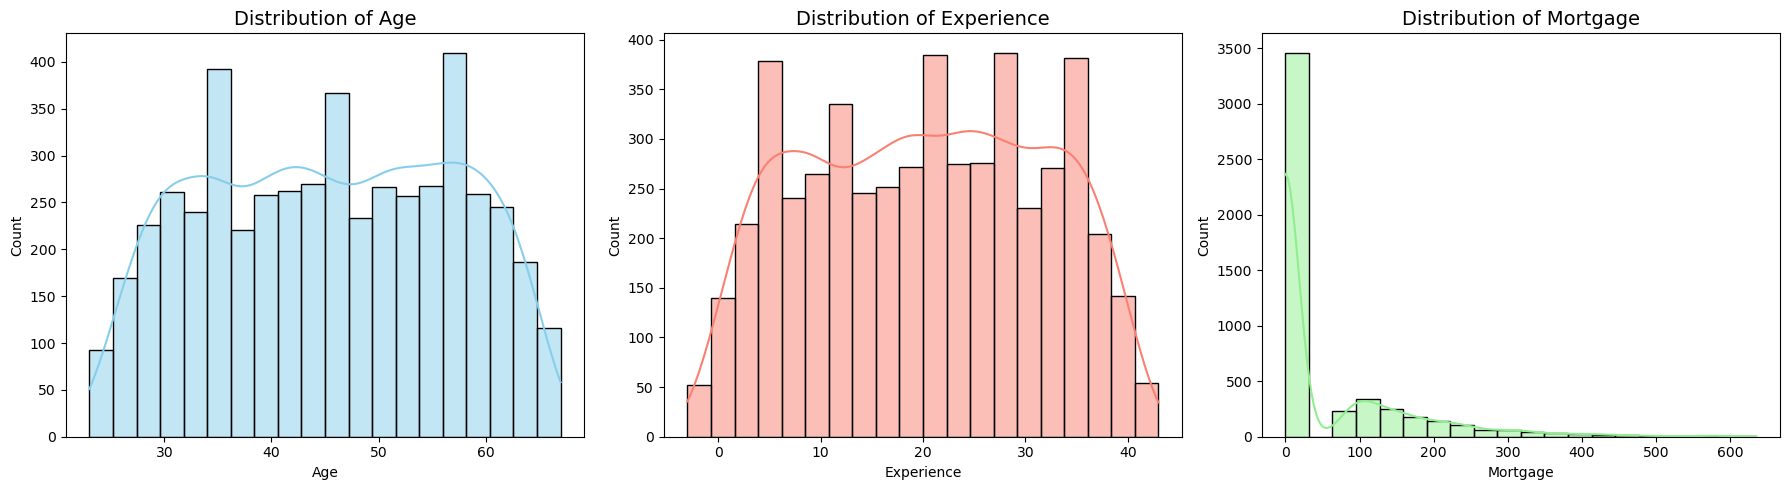

In [93]:

# Univariate analysis for AGE, Experince and Mortgage
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot: Age
sns.histplot(df_new["Age"], kde=True, bins=20, ax=axes[0], color="skyblue")
axes[0].set_title("Distribution of Age", fontsize=14)
axes[0].set_xlabel("Age")

# Plot: Experience
sns.histplot(df_new["Experience"], kde=True, bins=20, ax=axes[1], color="salmon")
axes[1].set_title("Distribution of Experience", fontsize=14)
axes[1].set_xlabel("Experience")

# Plot: Mortgage
sns.histplot(df_new["Mortgage"], kde=True, bins=20, ax=axes[2], color="lightgreen")
axes[2].set_title("Distribution of Mortgage", fontsize=14)
axes[2].set_xlabel("Mortgage")

plt.tight_layout()
plt.show()


### Univariate Analysis – Age, Experience, and Mortgage

- **Age**:
  - Most customers are between **30 and 50 years old**.
  - Very few customers are older than 60, indicating a younger to middle-aged customer base.

- **Experience**:
  - The distribution closely mirrors that of age, as expected.
  - Majority of customers have **5 to 30 years** of professional experience.
  - There are a few values close to 0 and even **negative values( this attribute needs some cleaning, we will change the negative values to positive)**

- **Mortgage**:
  - Highly right-skewed distribution.
  - A large number of customers have **no mortgage**.
  - A smaller group has mortgage values ranging up to 600k, but this is sparse and likely consists of high-value outliers.

These patterns suggest that most customers are in their **prime working years**, with **limited mortgage liabilities**, which can be a key factor in predicting their interest or eligibility for personal loans.


In [60]:
# Check how many negative values exist in the 'Experience' column
negative_experience_count = (df_new["Experience"] < 0).sum()

negative_experience_count


52

- There are 52 negative values in the dataset, which may indicate an error in data entry. Therefore, I will convert them to positive values.

In [63]:
# GPT Reference
# Correct only the negative values in 'Experience' by converting them to positive
df_new["Experience"] = df_new["Experience"].apply(lambda x: abs(x) if x < 0 else x)

(df_new["Experience"] < 0).sum()

0

Coverted all the values to positive, let's redo our analysis on experince 

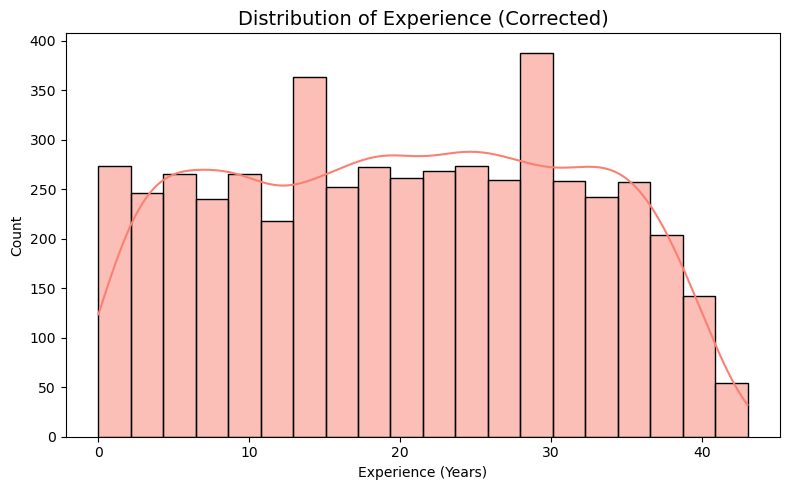

In [66]:
# plotting histogram for Experience after cleaning
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_new["Experience"], kde=True, bins=20, color="salmon")
plt.title("Distribution of Experience (Corrected)", fontsize=14)
plt.xlabel("Experience (Years)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Univariate Analysis – Experience (After Cleaning)

- The distribution of experience is now fully non-negative, following correction of data entry errors.
- Most customers have **between 5 and 30 years** of professional experience.
- The distribution peaks around **10 to 20 years**, aligning with mid-career professionals — a key demographic for loan targeting.
- There is a slight right-skew, but the spread is generally reasonable, indicating a well-balanced customer base in terms of experience.

This feature is important in loan prediction, as higher experience often correlates with job stability and income reliability.


# Bivariate analysis 

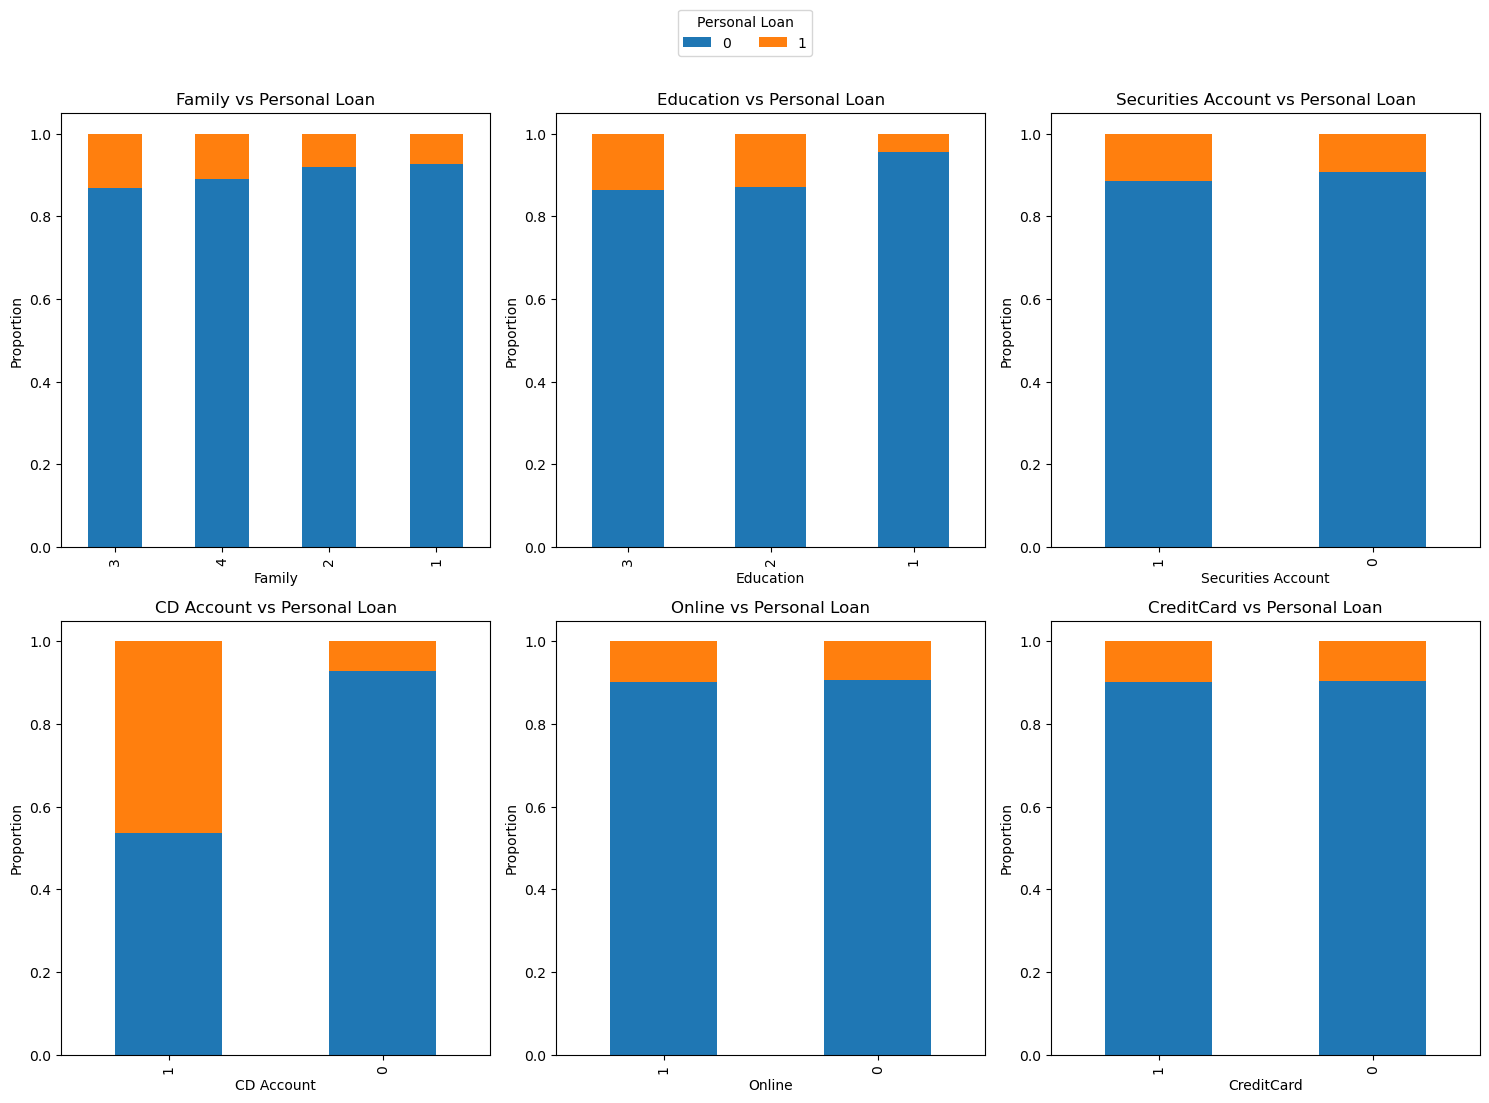

In [69]:
# columns for stacked bar chart analysis
columns_for_stacked = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

def stacked_barplot_grid(data, predictors, target='Personal Loan', rows=2, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    axes = axes.flatten()

    for i, predictor in enumerate(predictors):
        sorter = data[target].value_counts().index[-1]
        tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)

        tab.plot(kind='bar', stacked=True, ax=axes[i], legend=False)
        axes[i].set_title(f"{predictor} vs {target}")
        axes[i].set_ylabel("Proportion")
        axes[i].set_xlabel(predictor)

    # Remove empty subplots if any
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title=target, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
    plt.tight_layout()
    plt.show()

stacked_barplot_grid(data=df_new, predictors=columns_for_stacked, target='Personal Loan', rows=3, cols=3)


## Business Insights from Stacked Bar Charts

### 1. **Family (Family size of the customer)**
- Customers with **larger families (3 or 4 members)** are **more likely to take personal loans**.
- Likely due to **increased financial responsibilities** or needs like education, housing, or daily expenses.

---

### 2. **Education Level**
- Education is encoded as:
  - `1`: Undergrad  
  - `2`: Graduate  
  - `3`: Advanced/Professional
- Customers with **Advanced/Professional degrees (3)** have the **highest likelihood of taking loans**.
- Indicates that **higher education correlates with higher income**, better credit eligibility, and financial confidence.

---

### 3. **Personal Loan (Target Variable)**
- Confirms **class imbalance**: most customers did **not** take loans.
- Justifies the need to **optimize for recall** during modeling to avoid missing potential loan-takers.

---

### 4. **Securities Account**
- Customers **without a securities account** have a **slightly higher rate of loan acceptance**.
- They may be **less invested in long-term assets** and instead **rely on short-term credit** like personal loans.

---

### 5. **CD Account (Certificate of Deposit)**
- Customers **with a CD account** are **significantly more likely** to accept personal loans.
- Indicates possible **existing trust or engagement** with the bank, or bundled product offers.

---

### 6. **Online Banking**
- Internet banking users show a **slightly higher tendency to take loans**.
- Online users are likely **more digitally aware**, and **find it more convenient to apply**.

---

### 7. **Credit Card (Issued by Universal Bank)**
- Credit card holders have a **higher loan acceptance rate**.
- Suggests that they are already **financially active and familiar with borrowing**, making them ideal loan prospects.


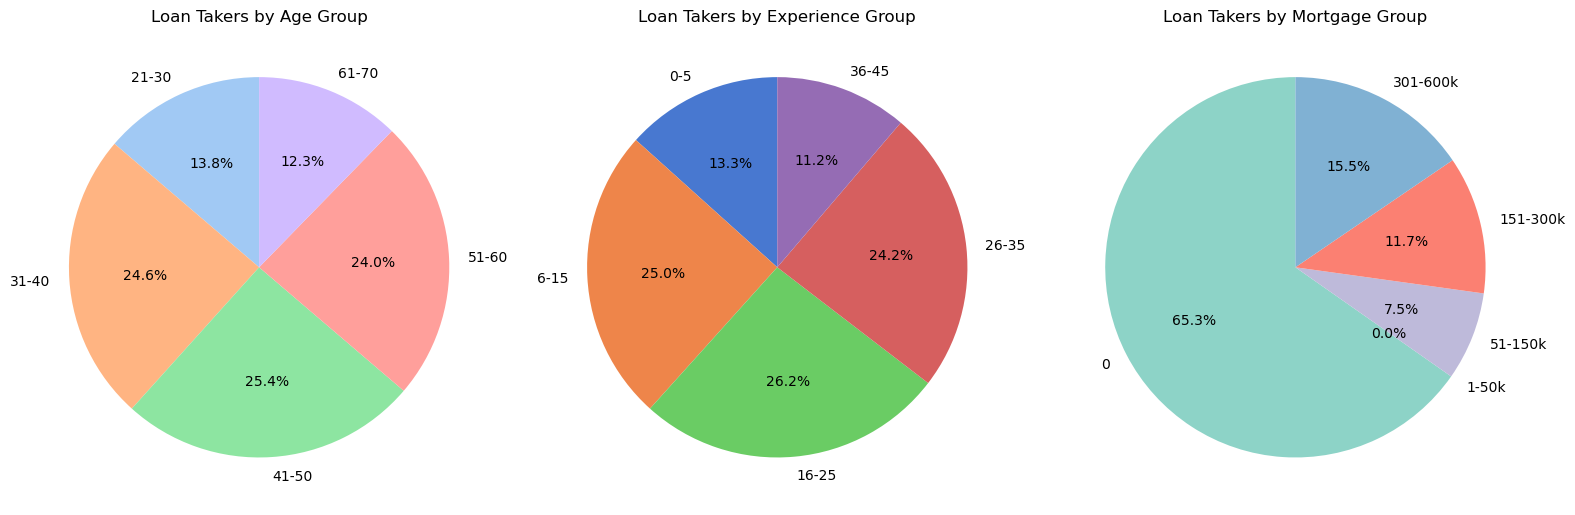

In [72]:
#GPT Reference for the code
# Create binned Age and Experience columns
df_new['Age Bin'] = pd.cut(df_new['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['21-30', '31-40', '41-50', '51-60', '61-70'])
df_new['Experience Bin'] = pd.cut(df_new['Experience'], bins=[-5, 5, 15, 25, 35, 45], labels=['0-5', '6-15', '16-25', '26-35', '36-45'])
df_new["Mortgage Bin"] = pd.cut(df_new["Mortgage"], bins=[-1, 0, 50, 150, 300, 600], labels=["0", "1-50k", "51-150k", "151-300k", "301-600k"])

# Create subplots for pie charts
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

# Pie chart for Age bins vs Personal Loan
age_loan_counts = df_new[df_new["Personal Loan"] == 1]['Age Bin'].value_counts().sort_index()
axes[0].pie(age_loan_counts, labels=age_loan_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[0].set_title("Loan Takers by Age Group")

# Pie chart for Experience bins vs Personal Loan
exp_loan_counts = df_new[df_new["Personal Loan"] == 1]['Experience Bin'].value_counts().sort_index()
axes[1].pie(exp_loan_counts, labels=exp_loan_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("muted"))
axes[1].set_title("Loan Takers by Experience Group")

# Pie chart: Mortgage Bin vs Loan Takers
mort_loan_counts = df_new[df_new["Personal Loan"] == 1]['Mortgage Bin'].value_counts().sort_index()
axes[2].pie(mort_loan_counts, labels=mort_loan_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
axes[2].set_title("Loan Takers by Mortgage Group")


plt.tight_layout()
plt.show()


## Pie Chart Insights: Loan Takers by Age, Experience, and Mortgage

### 1. **Age Group**
- The highest proportion of loan takers fall in the **31–50 year** range.
- Indicates that individuals in their **prime working age** are more likely to opt for personal loans.
- Younger (<30) and older (>60) groups contribute minimally, suggesting either lack of financial eligibility or lower credit needs.

---

### 2. **Experience Group**
- Most loan approvals are concentrated among those with **6–25 years of experience**.
- These customers likely represent a **financially stable middle class** with active borrowing needs.
- Individuals with very low (<5) or very high (>35) experience levels are less likely to take personal loans — possibly due to lack of credit history or existing wealth.

---

### 3. **Mortgage Group**
- A large share of loan takers have **no mortgage**.
- Indicates that customers with **less financial burden** are more likely to accept additional credit.
- Higher mortgage brackets (>150k) show a sharp decline in loan acceptance, hinting at a **credit saturation threshold** or debt aversion.

---

These insights suggest the bank should **target mid-career, financially active individuals with minimal existing debt** to boost loan conversions.


# Separating the predictors and target

In [75]:
df_new.drop(['Age Bin', 'Experience Bin', 'Mortgage Bin'], axis = 1, inplace= True)
df_new.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [77]:
X = df_new.drop(["Personal Loan"], axis=1)
y = df_new["Personal Loan"]

In [79]:
#X.head()

In [81]:
#y.head()

# Splitting the data into train and test set

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [86]:
y=pd.Series(y)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

print(y.value_counts(normalize=True).round(2))
print(y_train.value_counts(normalize=True).round(2))
print(y_test.value_counts(normalize=True).round(2))

Personal Loan
0    0.9
1    0.1
Name: proportion, dtype: float64
Personal Loan
0    0.91
1    0.09
Name: proportion, dtype: float64
Personal Loan
0    0.9
1    0.1
Name: proportion, dtype: float64


#### We observe that the ratio of class 0 to class 1 in the overall data is **90:10**, while it shifts slightly to **91:9** in the training set and remains at **90:10** in the test set. This minor variation in class distribution is considered acceptable and does not significantly affect model performance. Therefore, we do not use the `stratify=y` argument during train-test splitting in this case.


# Build Decision Tree Model

In [90]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

# Scoring our Decision Tree

In [93]:
print("Accuracy on training set : ", dTree.score(X_train, y_train))
print("Accuracy on test set : ", dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.98


#### The Decision Tree model shows an **accuracy of 100% on the training set** and **98% on the test set**. While the test accuracy is excellent, the perfect score on the training data indicates that the model may be **overfitting** — it has likely memorized the training data too well.
#### This is typical behavior for deep, unrestricted decision trees. To address this, we may consider **pruning** the tree or **limiting its depth** to improve generalization and reduce variance.#### Before pruning the tree, let's take a look at how our tree looks and examine the confusion matrix for further reference.


In [96]:
def make_confusion_matrix(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = metrics.confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")


# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

# Confusion Matrix - Before Pruning

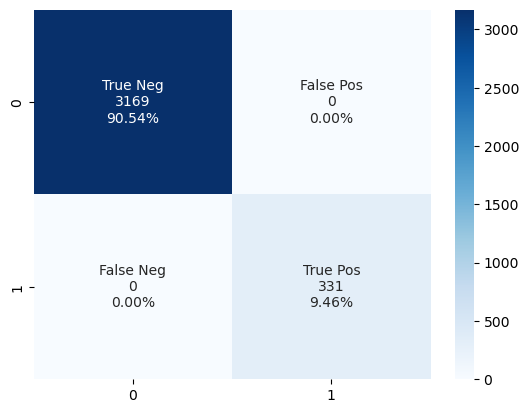

In [99]:
make_confusion_matrix(dTree, X_train, y_train)

In [101]:
print("Training performance")
model_performance_classification(dTree, X_train, y_train)

Training performance


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [103]:
print("Test performance")
model_performance_classification(dTree, X_test, y_test)

Test performance


,Accuracy,Recall,Precision,F1
0,0.98,0.885906,0.910345,0.897959


# Visualizing the Decision Tree - Before Pruning

In [106]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


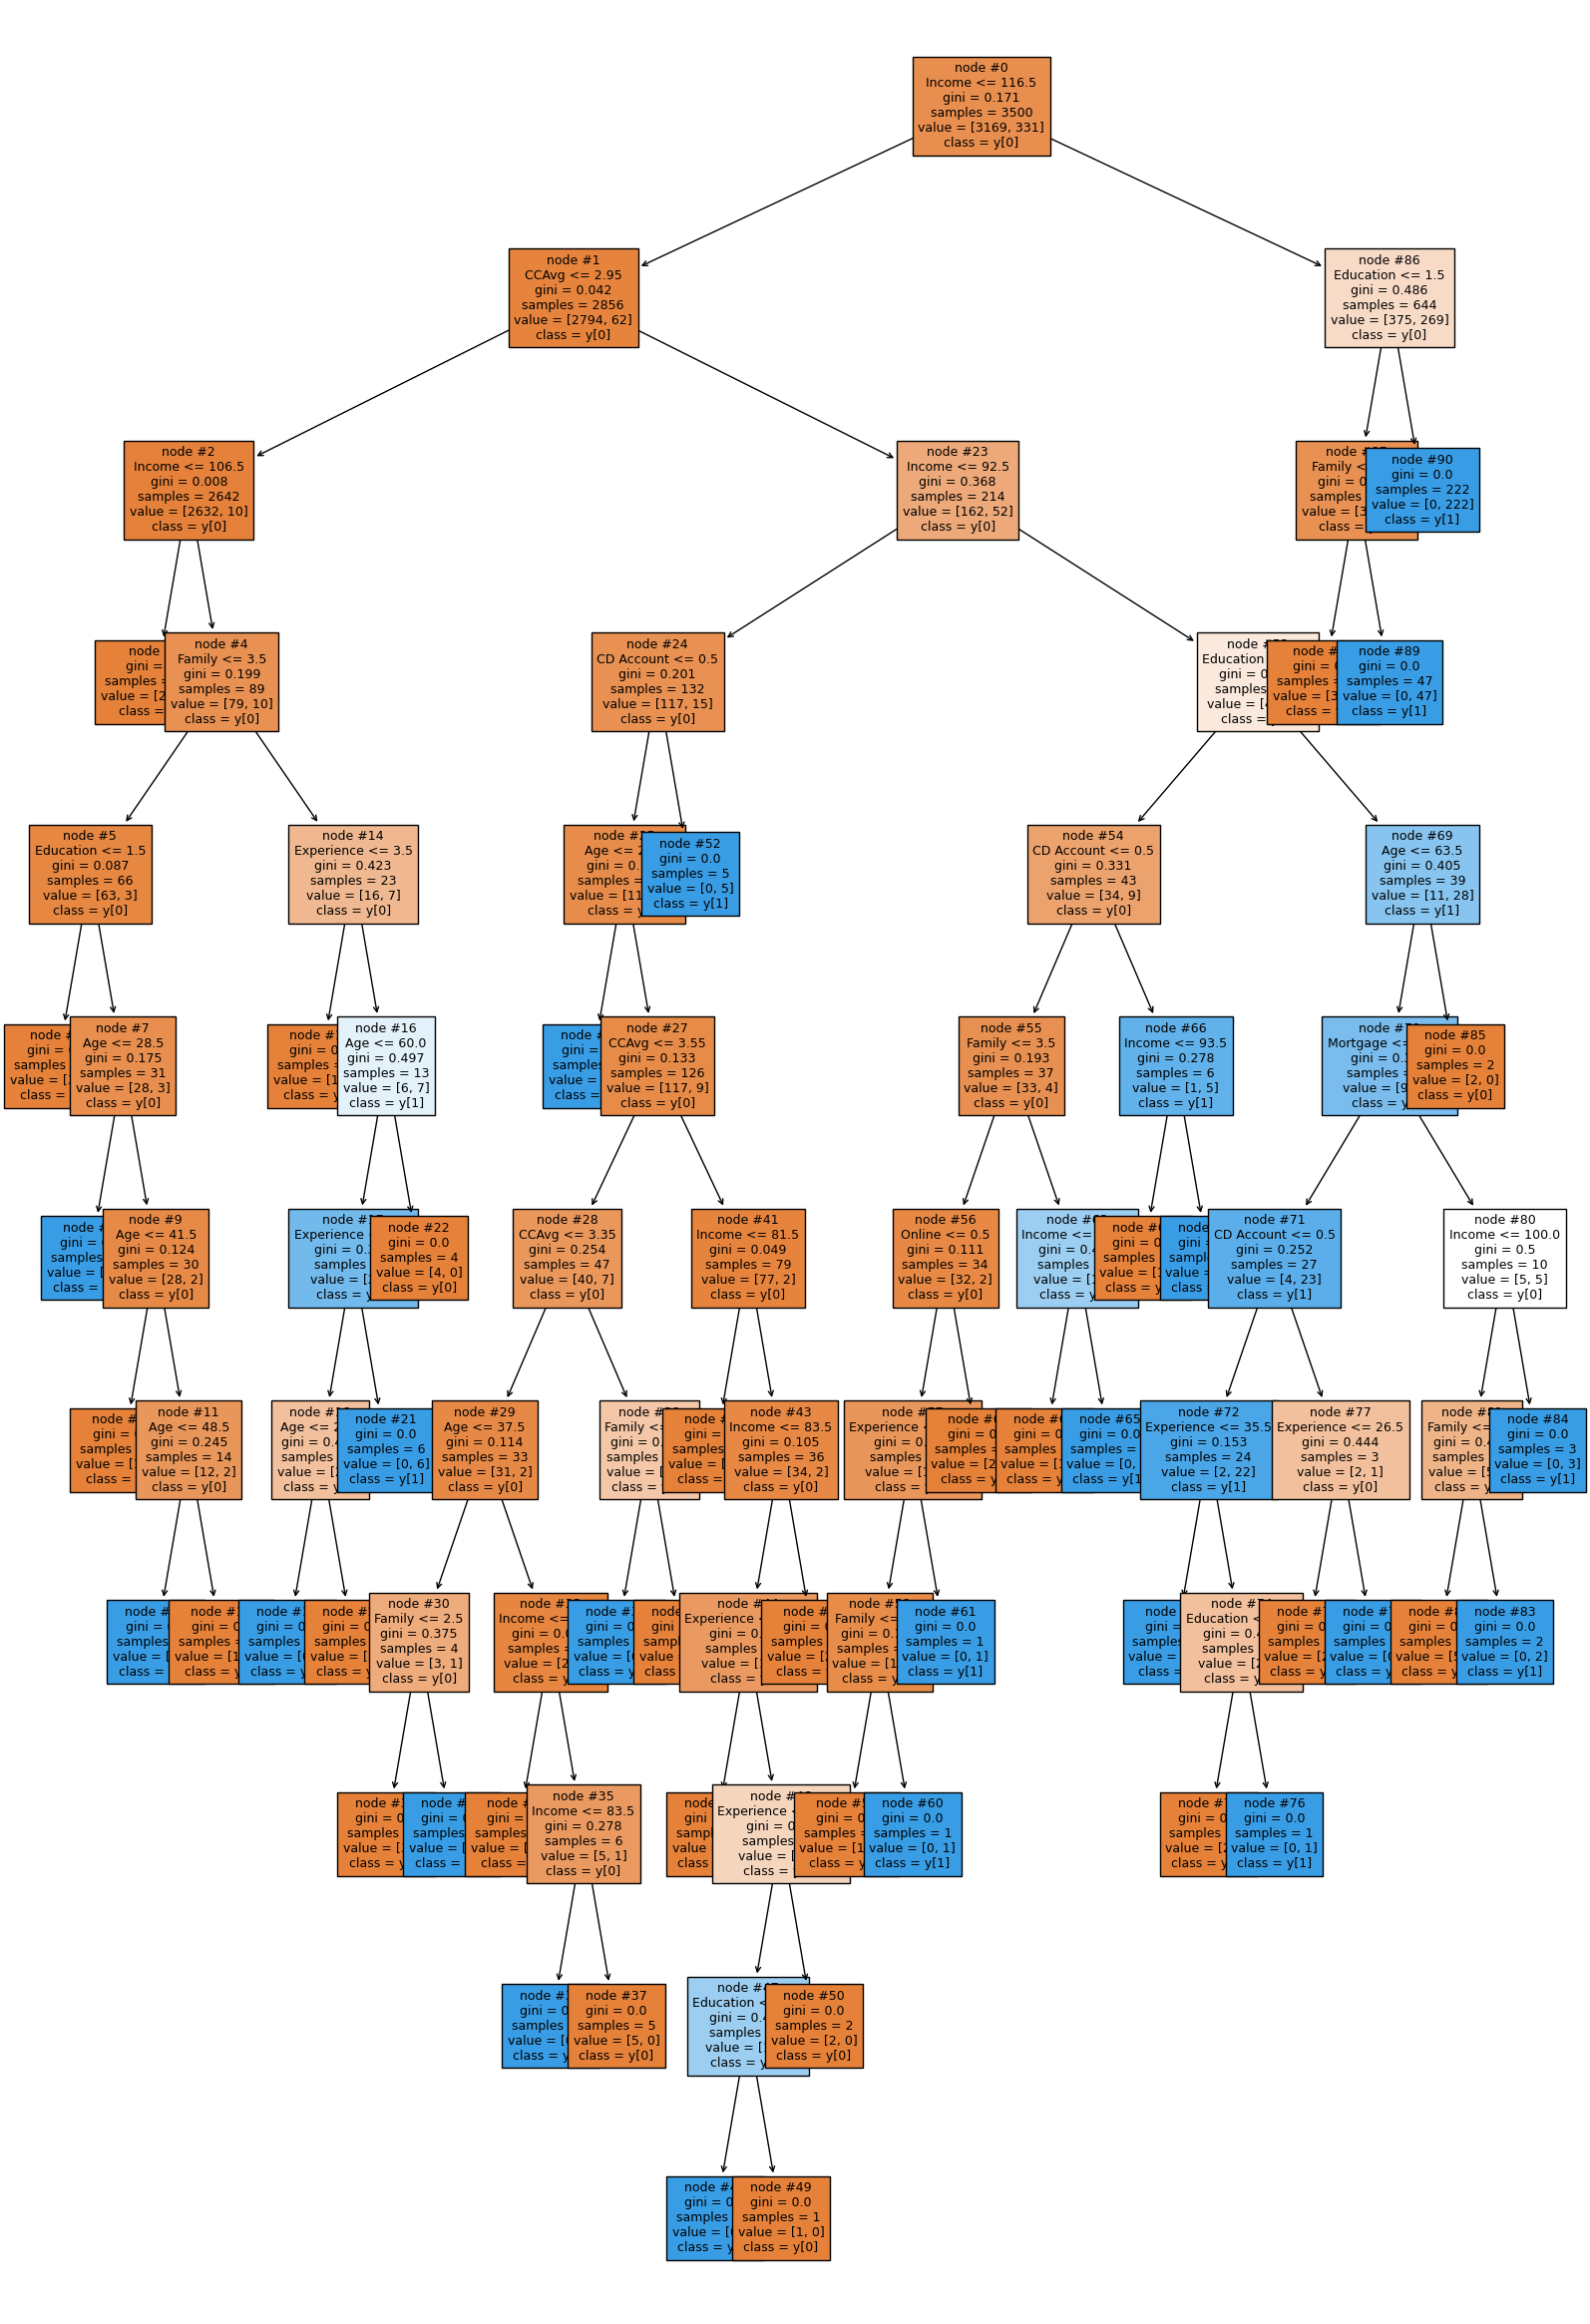

In [108]:
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.savefig("dtree.png", dpi=300, bbox_inches='tight')
plt.show()


### Decision Tree Visualization & Interpretation

The plotted decision tree appears to be **very deep and complex**, with a large number of nodes and splits. This indicates that the model is likely **overfitting** the training data — learning noise and specific patterns that do not generalize well to unseen data.

Such a large tree may memorize training samples, which is reflected in the perfect training accuracy (100%). To address this, we can try:
- **Limiting the tree depth** using `max_depth`
- **Pruning the tree** or controlling other hyperparameters like `min_samples_split` and `min_samples_leaf`

This will help reduce model variance and improve its ability to generalize to nest data.


# Gini importance

In [112]:
print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.405914
Income              0.310561
Family              0.167646
CCAvg               0.042183
CD Account          0.025711
Age                 0.023880
Experience          0.020528
Mortgage            0.003014
Online              0.000561
Securities Account  0.000000
CreditCard          0.000000


In [115]:
importances = dTree.feature_importances_
indices = np.argsort(importances)
#print(importances)
#print(indices)

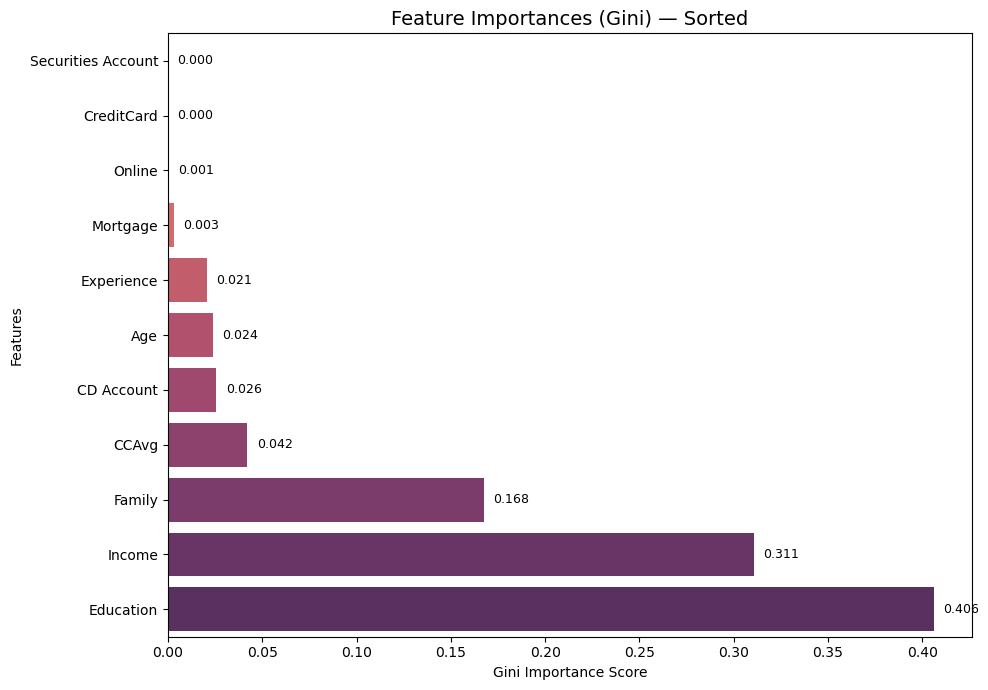

In [117]:
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plotting
plt.figure(figsize=(10, 7))
sns.barplot(x=sorted_importances, y=sorted_features, palette="flare")

for index, value in enumerate(sorted_importances):
    plt.text(value + 0.005, index, f"{value:.3f}", va='center', fontsize=9)

plt.title("Feature Importances (Gini) — Sorted", fontsize=14)
plt.xlabel("Gini Importance Score")
plt.ylabel("Features")
plt.tight_layout()

plt.show()

## Feature Importance Insights – Gini Index (Decision Tree)

The horizontal bar chart above visualizes the **Gini-based feature importances** derived from the trained Decision Tree model. These scores represent each feature’s relative contribution to the decision-making process.

- **Top 3 Influential Features**:
  - **Education** (≈ 40.6%) — Strongest predictor of loan acceptance, possibly due to correlation with income or financial awareness.
  - **Income** (≈ 31%) — Directly impacts creditworthiness and loan eligibility.
  - **Family** (≈ 16.8%) — Indicates that larger families may have more financial needs, influencing loan uptake.

- **Moderate Contributors**:
  - **CCAvg**, **CD Account**, **Age**, and **Experience** contribute marginally to the tree splits.
  - These features help refine decisions but are not primary drivers.

- **Least Important Features**:
  - **Mortgage**, **Online**, **Securities Account**, and **CreditCard** have very low or zero importance.
  - These variables did not contribute to any significant node splits in the tree.

### Conclusion:
The model heavily relies on **education level and income**, suggesting the bank could prioritize these indicators when targeting potential loan customers. Features with **zero importance** may be considered for removal or reevaluation in future models to reduce dimensionality.


# Reducing over fitting

In [121]:
dTree_short = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dTree_short.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

# Confusion Matrix - decision tree with depth restricted to 3

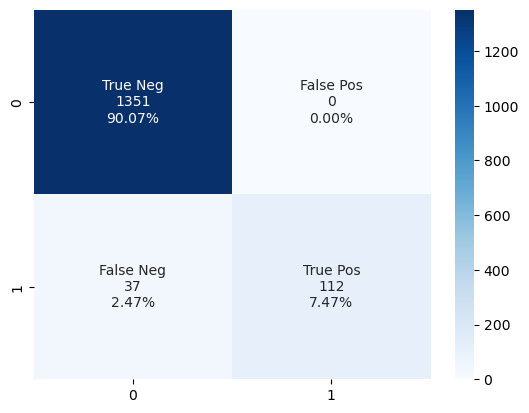

In [124]:
make_confusion_matrix(dTree_short, X_test, y_test)

In [126]:
print("Training performance")
model_performance_classification(dTree_short, X_train, y_train)

Training performance


,Accuracy,Recall,Precision,F1
0,0.982286,0.812689,1.0,0.896667


In [128]:
print("Test performance")
model_performance_classification(dTree_short, X_test, y_test)

Test performance


,Accuracy,Recall,Precision,F1
0,0.975333,0.751678,1.0,0.858238


## The pruned Decision Tree (with `max_depth=3`) shows **excellent generalization**, striking a balance between simplicity and performance. However, a closer inspection reveals a **critical business concern**:

### Model Performance
- **Precision (Test)**: `1.00` → The model made **no false positive** predictions.
- **Recall (Test)**: `0.75` → The model **missed 25% of actual loan-takers**.
- **False Negatives (FN)**: `37` customers who would have taken a loan were predicted as non-loan-takers.

This gap results in a **missed revenue opportunity**, as these customers were not targeted for loans despite being likely to accept them.

---

### Business-Aligned Strategy: Reduce False Negatives

To better align with the business goal of maximizing loan conversions, our strategy should focus on **increasing recall**, even at the cost of a few more false positives.

---

### Using Grid Search CV for Hyperparameter Tuning

Instead of manually setting parameters like `max_depth=3`, we can use **GridSearchCV** to systematically search for the best combination of hyperparameters such as:
- `criterion`: `'gini'` or `'entropy'`
- `max_depth`: from shallow to deeper trees
- `min_samples_split` and `min_samples_leaf`: to control branching

This approach allows the model to **automatically balance complexity and performance**, improving generalization while potentially reducing **false negatives**.

Once the best model is selected through **cross-validation**, we evaluate its precision, recall, and F1-score — ideally aiming for **higher recall** to capture more actual loan-takers.


In [131]:
# Choose the type of classifier.
dtree = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": [3, 5, 10, 20],
    "min_samples_leaf": [1, 3, 5],
    "max_leaf_nodes": [10, 20, 30, 40],
    "min_impurity_decrease": [0.0, 0.001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(dtree, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

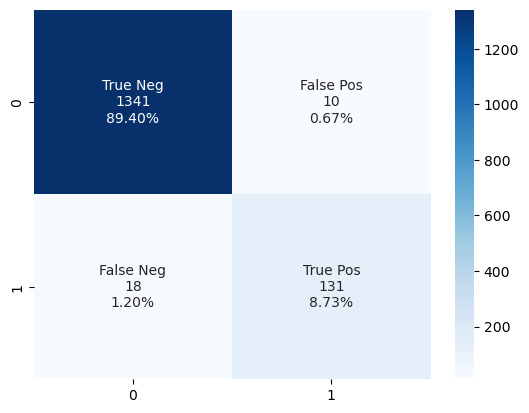

In [132]:
make_confusion_matrix(dtree_tuned, X_test, y_test)

## Model Comparison: Pruned Tree vs Grid Search Tuned Tree

We compare two Decision Tree models to assess their suitability for the bank’s objective of increasing personal loan uptake:

1. **Pruned Tree** (`max_depth=3`)
2. **GridSearchCV Tuned Tree** with:
   - `max_depth=5`
   - `max_leaf_nodes=10`
   - `min_impurity_decrease=0.001`

---

### Confusion Matrix Comparison (Test Set):

| Model                   | True Positives | False Negatives | False Positives | True Negatives |
|------------------------|----------------|------------------|------------------|----------------|
| **Pruned Tree**        | 112            | 37               | 0                | 1351           |
| **Tuned Tree (GridCV)**| **131**        | **18**           | 10               | 1341           |

---

### Business Objective

The primary goal of the bank is to **maximize the number of potential loan customers**, i.e., predict **as many actual loan-takers (class = 1)** as possible.

In this context:

- **False Negatives** (missed loan-takers) = **Lost revenue opportunities**
- **False Positives** (non-loan-takers incorrectly targeted) = Minor **marketing or outreach costs**

Hence, the **cost of a False Negative is significantly higher** than that of a False Positive.

---

### Insights:
- #### The tuned model reduced False Negatives from 37 to **18**, capturing **19 more real loan-takers**.
- #### This means the bank would reach more eligible customers who are likely to accept a loan offer — directly contributing to revenue.
- #### The model introduced 10 False Positives, which may lead to slight additional marketing effort, but this is acceptable.
- #### The business impact of a False Positive is limited to **outreach costs**, which are far less consequential than **missing a real customer**.
- #### Despite the trade-off, the overall model performance remains strong across all metrics.

---

### Final Recommendation:

#### Given the bank’s goal to **maximize loan conversions**.

- It achieves a **much better recall**, reducing lost opportunities.
- The slight dip in precision is justified, as it incurs minimal cost.
- This model is more aligned with the **business objective of customer acquisition and revenue growth**.


# Prediction

In [137]:
new_customer = pd.DataFrame([{
    'Age': 40,
    'Experience': 10,
    'Income': 84,
    'Family': 2,
    'CCAvg': 2,
    'Education': 2,
    'Mortgage': 0,
    'Securities Account': 0,
    'CD Account': 0,
    'Online': 1,
    'CreditCard': 1
}])

loan_prediction = dtree_tuned.predict(new_customer)[0]
loan_prediction

0

## Prediction for a New Customer

We used the **GridSearchCV-tuned Decision Tree model** (with `max_depth=5`, `max_leaf_nodes=10`, `min_impurity_decrease=0.001`) to predict whether a new customer would accept a personal loan.



### Model Output:
- **Predicted Class**: `0`  
- **Interpretation**: The model predicts that this customer **will not take the personal loan**.
